In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/taehojo/data-ch20.git

Cloning into 'data-ch20'...
remote: Enumerating objects: 265, done.
remote: Counting objects: 100% (265/265), done.
remote: Compressing objects: 100% (265/265), done.
remote: Total 265 (delta 0), reused 265 (delta 0), pack-reused 0
Receiving objects: 100% (265/265), 1.86 MiB | 35.97 MiB/s, done.


In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1)

train_generator = train_datagen.flow_from_directory(
    './data-ch20/train',
    target_size = (150, 150),
    batch_size = 5,
    class_mode = 'binary')

Found 160 images belonging to 2 classes.


In [17]:
test_datagen= ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    './data-ch20/test',
    target_size = (150, 150),
    batch_size = 5,
    class_mode = 'binary'
)

Found 120 images belonging to 2 classes.


In [25]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation_12 (Activation)  (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_13 (Activation)  (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                  

In [19]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

In [20]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [21]:
history = model.fit(
    train_generator,
    epochs = 100,
    validation_data=test_generator,
    validation_steps=10,
    callbacks=[early_stopping_callback]
)

Epoch 1/100
32/32 [==============================] - 13s 38ms/step - loss: 0.7040 - accuracy: 0.5063 - val_loss: 0.6859 - val_accuracy: 0.5200
Epoch 2/100
32/32 [==============================] - 1s 34ms/step - loss: 0.6827 - accuracy: 0.5437 - val_loss: 0.6786 - val_accuracy: 0.5400
Epoch 3/100
32/32 [==============================] - 1s 34ms/step - loss: 0.7015 - accuracy: 0.4500 - val_loss: 0.6726 - val_accuracy: 0.6200
Epoch 4/100
32/32 [==============================] - 1s 34ms/step - loss: 0.6792 - accuracy: 0.6062 - val_loss: 0.6625 - val_accuracy: 0.5200
Epoch 5/100
32/32 [==============================] - 1s 36ms/step - loss: 0.6724 - accuracy: 0.5875 - val_loss: 0.6469 - val_accuracy: 0.7200
Epoch 6/100
32/32 [==============================] - 1s 34ms/step - loss: 0.6704 - accuracy: 0.5875 - val_loss: 0.6356 - val_accuracy: 0.8400
Epoch 7/100
32/32 [==============================] - 1s 34ms/step - loss: 0.6360 - accuracy: 0.6375 - val_loss: 0.5661 - val_accuracy: 0.8000
Epoch

In [22]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

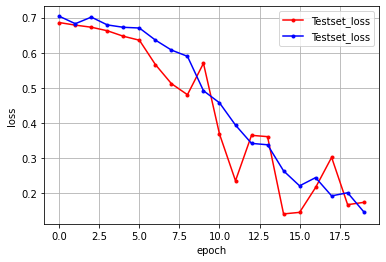

In [23]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Testset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()